In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [77]:
data = pd.read_csv('GOOGL.csv')
# https://www.kaggle.com/datasets/aayushmishra1512/google-data-historic-dataset
# this dataset is used to predict closing price of Google stock based on historical data
# features like opening price, high, low, volume data, and dates are used

In [78]:
data_info = data.info()
data_head = data.head()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4041 non-null   object 
 1   Open       4041 non-null   float64
 2   High       4041 non-null   float64
 3   Low        4041 non-null   float64
 4   Close      4041 non-null   float64
 5   Adj Close  4041 non-null   float64
 6   Volume     4041 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 221.1+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600
...,...,...,...,...,...,...,...
4036,2020-08-31,1643.569946,1644.500000,1625.329956,1629.530029,1629.530029,1321100
4037,2020-09-01,1632.160034,1659.219971,1629.530029,1655.079956,1655.079956,1133800
4038,2020-09-02,1668.010010,1726.099976,1660.189941,1717.390015,1717.390015,2476100
4039,2020-09-03,1699.520020,1700.000000,1607.709961,1629.510010,1629.510010,3180200


In [79]:
data['Date'] = pd.to_datetime(data['Date'])
data['DateOrdinal'] = data['Date'].map(pd.Timestamp.toordinal)  # number of days since a fixed date, January 1 of year 1 AD
data['DateOrdinal']

0       731812
1       731813
2       731816
3       731817
4       731818
         ...  
4036    737668
4037    737669
4038    737670
4039    737671
4040    737672
Name: DateOrdinal, Length: 4041, dtype: int64

In [80]:
features = ['Open', 'High', 'Low', 'Volume', 'DateOrdinal']
target = 'Close'

random.seed(42)
shuffled = np.random.permutation(len(data))
data_shuffled = data.iloc[shuffled]
n = int(0.9*len(data))  # 90% train, 10% test

In [81]:
train_data = data_shuffled[:n]
test_data = data_shuffled[n:]

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

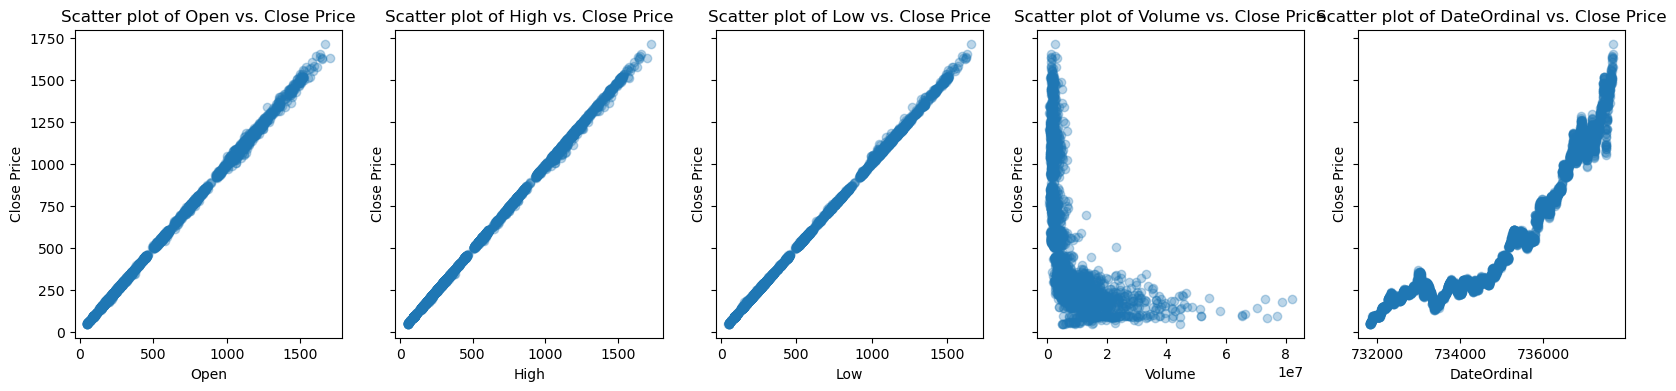

In [82]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4), sharey=True)  # Adjust the figsize to ensure each subplot is clearly visible

for i, feature in enumerate(features):
    ax[i].scatter(X_train[feature], y_train, alpha=0.3)
    ax[i].set_title(f'Scatter plot of {feature} vs. Close Price')
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Close Price')

In [83]:
X_test.shape, y_train.shape

((405, 5), (3636,))

In [84]:
scaler = StandardScaler()  # to do the z-score normalization
X_norm = scaler.fit_transform(X_train)

In [85]:
model = LinearRegression()
model.fit(X_norm, y_train)

w_norm = model.coef_
b_norm = model.intercept_

print(f'model parameters:')
print(f'w: {w_norm} \nb = {b_norm}')

model parameters:
w: [-2.28908518e+02  3.09626524e+02  3.05040780e+02  9.54134086e-02
  3.28943659e-02] 
b = 536.6811440720571


In [86]:
# predict data using trained model
# on train set

# using predict() function
y_pred = model.predict(X_norm)

print(f"\nPrediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{list(y_train[:4])}")


Prediction on training set:
[1062.65861529 1212.63668386  398.81802314  196.69198447]
Target values 
[1055.410034, 1207.359985, 397.492493, 195.930923]


In [87]:
# predict data using trained model
# on test set

X_test_norm = scaler.transform(X_test)
# using predict() function
y_pred = model.predict(X_test_norm)

print(f"\nPrediction on test set:\n{y_pred[:5]}" )
print(f"Target values \n{list(y_test[:5])}")


Prediction on test set:
[ 191.6555522  1225.1747338   957.40233583  255.16934343  232.32733832]
Target values 
[190.565567, 1217.410034, 958.330017, 257.61261, 230.965973]


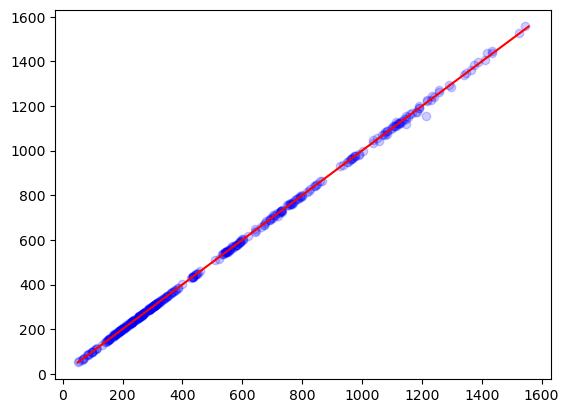

In [88]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.2)
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color="red")

In [89]:
print(f'Accuracy on test set:', model.score(X_test_norm, y_test))
print(f'mse: {mean_squared_error(y_test, y_pred)}')
print(f'r2 score: {r2_score(y_test, y_pred)}')

Accuracy on test set: 0.9998403834288937
mse: 20.61276866068602
r2 score: 0.9998403834288937
